Copyright (c) 2024 Massachusetts Institute of Technology

SPDX-License-Identifier: MIT

# Observing a Satellite with a Sensor Network
As we saw in the previous example notebook, a single sensor can't see everything on its own. That's why we in real life we use sensor networks, collections of different telescopes across the globe whose observations we can combine.

`madlib` makes it easy to define several sensors and join them into one of these networks. Then, we can propagate a satellite, have all of these sensors observe it, and obtain a single easy-to-use data collection at the end.

## Defining a Sensor Network in Python
We'll begin this example by defining 5 imaginary sensors directly in Python code. See the previous notebook for in-depth explanations of the various parameters.

In [1]:
obs_limits = {"el": (15, 90), "sun_el": (-90, -18)}

sensor_1_params = {}
sensor_1_params["id"] = "Alpha"
sensor_1_params["lat"] = 0.0
sensor_1_params["lon"] = 0.0
sensor_1_params["alt"] = 0.0
sensor_1_params["dra"] = 1.0
sensor_1_params["ddec"] = 1.0
sensor_1_params["obs_per_collect"] = 3
sensor_1_params["obs_time_spacing"] = 1
sensor_1_params["collect_gap_mean"] = 60
sensor_1_params["collect_gap_std"] = 5
sensor_1_params["obs_limits"] = obs_limits

sensor_2_params = {}
sensor_2_params["id"] = "Bravo"
sensor_2_params["lat"] = 0.0
sensor_2_params["lon"] = 15.0
sensor_2_params["alt"] = 0.0
sensor_2_params["dra"] = 1.0
sensor_2_params["ddec"] = 1.0
sensor_2_params["obs_per_collect"] = 5
sensor_2_params["obs_time_spacing"] = 1
sensor_2_params["collect_gap_mean"] = 10
sensor_2_params["collect_gap_std"] = 0
sensor_2_params["obs_limits"] = obs_limits

sensor_3_params = {}
sensor_3_params["id"] = "Charlie"
sensor_3_params["lat"] = 0.0
sensor_3_params["lon"] = 30.0
sensor_3_params["alt"] = 0.0
sensor_3_params["dra"] = 10.0
sensor_3_params["ddec"] = 10.0
sensor_3_params["obs_per_collect"] = 1
sensor_3_params["obs_time_spacing"] = 0
sensor_3_params["collect_gap_mean"] = 600
sensor_3_params["collect_gap_std"] = 0
sensor_3_params["obs_limits"] = obs_limits

sensor_4_params = {}
sensor_4_params["id"] = "Delta"
sensor_4_params["lat"] = 0.0
sensor_4_params["lon"] = 45.0
sensor_4_params["alt"] = 0.0
sensor_4_params["dra"] = 1.0
sensor_4_params["ddec"] = 1.0
sensor_4_params["obs_per_collect"] = 3
sensor_4_params["obs_time_spacing"] = 1
sensor_4_params["collect_gap_mean"] = 120
sensor_4_params["collect_gap_std"] = 5
sensor_4_params["obs_limits"] = obs_limits

sensor_5_params = {}
sensor_5_params["id"] = "Echo"
sensor_5_params["lat"] = 0.0
sensor_5_params["lon"] = 60.0
sensor_5_params["alt"] = 0.0
sensor_5_params["dra"] = 1.0
sensor_5_params["ddec"] = 1.0
sensor_5_params["obs_per_collect"] = 3
sensor_5_params["obs_time_spacing"] = 1
sensor_5_params["collect_gap_mean"] = 120
sensor_5_params["collect_gap_std"] = 5
sensor_5_params["obs_limits"] = obs_limits

That's a lot of information! For now, focus on the following:
- We have five sensors
- Their longitudes span 0 to 60 degrees in even intervals
- Their latitudes are all 0
- Sensor "Charlie" is much noisier than the others, and it only collects data once every 10 minutes

Now we just have to combine these sensors into a `SensorCollection` object:

In [2]:
import madlib

sensor_network = madlib.SensorCollection(
    [
        madlib.GroundOpticalSensor(**sensor_1_params),
        madlib.GroundOpticalSensor(**sensor_2_params),
        madlib.GroundOpticalSensor(**sensor_3_params),
        madlib.GroundOpticalSensor(**sensor_4_params),
        madlib.GroundOpticalSensor(**sensor_5_params),
    ]
)

## Making Observations with a Sensor Network
`SenorCollection` works a bit differently than `OpticalSensor`, but we still begin by defining our satellite and observation period. Let's use the same LEO object from previous examples, but restrict its motion to the equatorial plan and observe for 24 hours:

In [3]:
import numpy as np

epoch_mjd = 60197.5
start_mjd = epoch_mjd
end_mjd = start_mjd + 1

leo_alt_km = 430.0
leo_speed_kms = 27500.0 / 3600  # Converting from km/h to km/s
earth_radius_km = 6378.0

leo_pos_teted = np.array([leo_alt_km + earth_radius_km, 0, 0])
leo_vel_teted = leo_speed_kms * np.array([0, 1, 0])

leo_satellite = madlib.Satellite(epoch=epoch_mjd, pos=leo_pos_teted, vel=leo_vel_teted)

Next, we need to generate the schedule of observations. This process simply iterates over the sensors in the collection and determines the specific times at which they will attempt to collect data, based on the "obs_per_collect", "obs_time_spacing", "collect_gap_mean" and "collect_gap_std" parameters.

In [4]:
# There's no output, the schedule is saved internally
sensor_network.generate_obs_timing(start=start_mjd, end=end_mjd)

Finally, all we have to do is run the `SensorCollection.observe()` function. Just like when we observe using a single sensor, we get an `ObservationCollection` object.

In [5]:
network_observations = sensor_network.observe(target_satellite=leo_satellite)
print(network_observations)

ObservationCollection(pos_observed=array([Observation(mjd=60197.804811895716, ra=-155.21005775050136, dec=-0.0018817143428408848, az=269.99791602336506, el=15.49170676336058, range_=None, range_rate=None, lat=None, lon=None, sun_el=-20.712844814126555, sun_separation=None, sensor_id='Alpha'),
       Observation(mjd=60197.80482346979, ra=-155.0529433100505, dec=-0.002195432133841427, az=269.9975885370318, el=15.644643124520755, range_=None, range_rate=None, lat=None, lon=None, sun_el=-20.716994893751522, sun_separation=None, sensor_id='Alpha'),
       Observation(mjd=60197.80483504386, ra=-154.89346873665775, dec=-0.0021193300793128987, az=269.9976656364844, el=15.799939625631518, range_=None, range_rate=None, lat=None, lon=None, sun_el=-20.72114496997639, sun_separation=None, sensor_id='Alpha'),
       ...,
       Observation(mjd=60198.02513733557, ra=119.01012884070508, dec=0.023250687823112872, az=89.97304354390796, el=29.82242564759488, range_=None, range_rate=None, lat=None, lon=No

We can plot these results exactly like we did in the previous notebook. Let's also add an extra step and color the data points according to the sensor used to collect them.

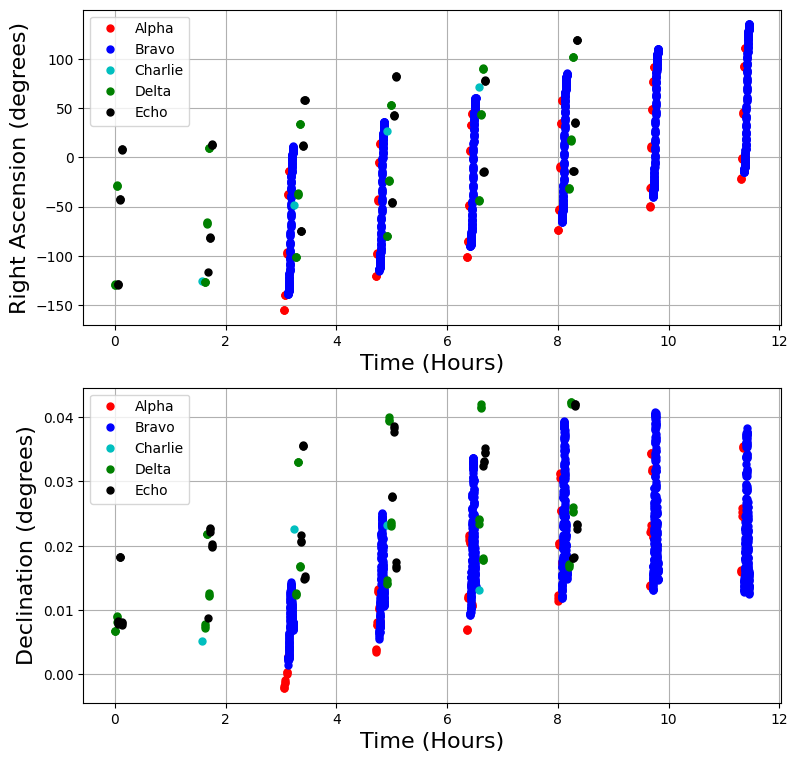

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

times = np.array([o.mjd for o in network_observations.pos_observed])
times = 24 * (times - min(times))  # Convert the times from days to hours
ra = np.array([o.ra for o in network_observations.pos_observed])
dec = np.array([o.dec for o in network_observations.pos_observed])

# Color by sensor
sensors = np.array([o.sensor_id for o in network_observations.pos_observed])
color_map = {"Alpha":"r", "Bravo":"b", "Charlie":"c", "Delta":"g", "Echo":"k"}

fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 9))

for sensor_id, color in color_map.items():
    index = np.where(sensors == sensor_id)[0]
    t = times[index]
    x = ra[index]
    y = dec[index]
    _ = ax1.plot(t, x, f"o{color}", ms=5, lw=2, label=sensor_id)
    _ = ax2.plot(t, y, f"o{color}", ms=5, lw=2, label=sensor_id)
ax1.set_ylabel("Right Ascension (degrees)", fontsize=16)
ax1.set_xlabel("Time (Hours)", fontsize=16)
ax2.set_ylabel("Declination (degrees)", fontsize=16)
ax2.set_xlabel("Time (Hours)", fontsize=16)
ax1.grid()
ax2.grid()
_ = ax1.legend()
_ = ax2.legend()

First of all, you might immediately notice that the measurements across different sensors don't exactly match up. This is due to parallax, since we have sensors in very different geographic positions observing a low-flying object. This is a true-to-life effect that must be considered when working with RA/DEC measurements from an optical sensor array.

With our sensor network, we have a much more complete picture of the satellite's motion. Notice also how the cyan-colored points for sensor "Charlie" are significantly noisier than the others, just as expected based on the sensor configurations.

## Defining a Sensor Network with a YAML File
What if we wanted to reuse this sensor network in a different simulation? Or a colleague wanted to replicate our experiment? Defining a sensor network in a standalone Python file will work, but you can also define the network in a YAML file if you prefer to keep your configurations separate from your code.

The format for `SensorCollection` YAML files is below. Any key that can be set to an arbitrary value is wrapped in \<angle brackets\>. You can also find an example in this repository at `examples/example_inputs/sample_sensor_network.yaml`

### YAML Syntax

    sensor_list:
      <Sensor_1>:
        id: Sensor 1
        lat: 0.0
        lon: 0.0
        alt: 0.0
        dra: 0.0
        ddec: 0.0
        obs_per_collect: 1
        obs_time_spacing: 0.0
        collect_gap_mean: 0.0
        collect_gap_std: 0.0
        obs_limits:
          el: [0.0, 90.0]
          sun_el: [0.0, 90.0]

      <Sensor 2>:
        ...
        

The YAML format even lets you define constants for commonly reused settings within a file. Below, we define a constant "twilight_sun_el" for the limits on the sun's elevation during astronomical twilight. If we decide to adjust those values for any reason, we just have to change the constant to affect every sensor that uses it.

    twilight_sun_el: &twilight_sun_el [-90, -18.0]

    sensor_list:
      Sensor_1:
        id: Sensor 1
        ...
        obs_limits:
          el: [15.0, 90]
          sun_el: *twilight_sun_el
      

And of course, `madlib` makes it easy to turn a properly-formatted YAML file into a fully functioning `SensorCollection` object:

In [7]:
yamlSensor = madlib.SensorCollection.fromYAML(
    "example_inputs/sample_sensor_network.yaml"
)